    Year  San Diego County  San Diego County_Rev  San Diego County_GDP  \
0   1990           2513216            3582779101            53400000.0   
1   1991           2554271            3302686461            60060000.0   
2   1992           2601147            3094929236            66720000.0   
3   1993           2609266            3086313984            73380000.0   
4   1994           2626939            2991683172            80040000.0   
5   1995           2641561            2864419610            86700000.0   
6   1996           2673685            2644541275            93360000.0   
7   1997           2722060            2583513770           100020000.0   
8   1998           2766123            2326896846           106680000.0   
9   1999           2820844            2222000000           113340000.0   
10  2000           2827366            2832192530           120000000.0   
11  2001           2869672            2119544911           117083125.0   
12  2002           2900355            

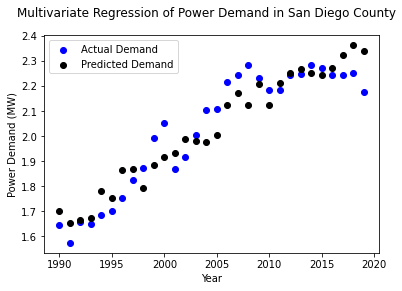

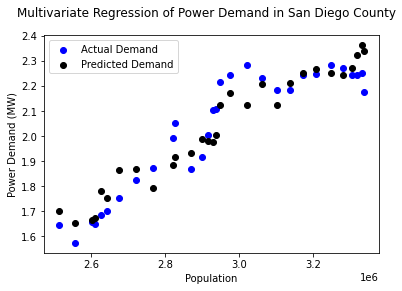

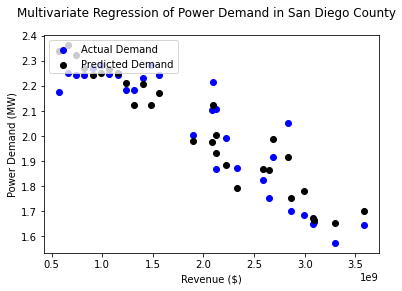

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# change county name accordingly
county_name = "San Diego County"
county_name_short = "San Diego"

# to add more features, 1. read csv 2. add county name to dataframe 3. insert
df_population = pd.read_csv("population_all.csv")
df_revenue = pd.read_csv("revenue_all.csv")
df_gdp = pd.read_csv("gdp_by_county.csv")# 1.
df_rainfall = pd.read_csv("rainfall_by_county.csv")
df_population = df_population[["Year", county_name]]
df_revenue = df_revenue[[county_name_short]] # 2.
df_gdp = df_gdp[[county_name]]
df_rainfall = df_rainfall[[county_name]]

X = df_population
X.insert(2, f"{county_name}_Rev", df_revenue[df_revenue.columns[0]]) # 3.
X.insert(3, f"{county_name}_GDP", df_gdp[df_gdp.columns[0]])
X.insert(4, f"{county_name}_Rain", df_rainfall[df_rainfall.columns[0]])
# X["Alameda County_Rev"] = X["Alameda County_Rev"].astype(float)
print(X)
print(X.dtypes)

df_demand = pd.read_csv("demand_all.csv")
y = df_demand[[county_name]]

linear_regression = LinearRegression()
linear_regression.fit(X, y)
y_pred = linear_regression.predict(X)


def get_slopes():
    slopes_list = linear_regression.coef_.tolist()

    slopes_str = []
    for element in slopes_list[0]:
        slopes_str.append(str(element))
    for element in slopes_str[0]:
        slopes_str.extend(element.split(','))

    return slopes_str


intercept = linear_regression.intercept_
slopes = get_slopes()

# Change # of slopes to match # of features (length of slopes) accordingly
print("y = ", slopes[0], "x1 + ", slopes[1], "x2 + ", slopes[2], "x3 + ", intercept[0])


def plot_chart(feature_name, feature, target, target_pred, county):
    figure = plt.figure()
    figure.suptitle(f"Multivariate Regression of Power Demand in {county}")
    plt.scatter(x=feature, y=target, color="blue", label="Actual Demand")
    plt.scatter(x=feature, y=target_pred, color="black", label="Predicted Demand")
    plt.xlabel(feature_name)
    plt.ylabel("Power Demand (MW)")
    plt.legend(loc="upper left")


# Adjust features accordingly
features_list = ["Year", "Population", "Revenue ($)"]
for i in range(len(features_list)):
    plot_chart(features_list[i], X.iloc[:, i], y, y_pred, county_name)

plt.show()